In [11]:
import pandas as pd

In [12]:
file_path = "/jf-training-home/NLP_Model/datasets_ro/merged_data_clean.csv"

df_merged = pd.read_csv(file_path, encoding='utf-8', sep=',')

In [13]:
df_cleaned = df_merged.dropna()
print(df_cleaned)


                                                     text  label
0       (현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...      1
1       ....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...      0
2       ...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...      1
3                      1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데      0
4       1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...      1
...                                                   ...    ...
207891          오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함      1
207892         의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OO      0
207893                 그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다      0
207894     절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네      0
207895                                         마무리는 또 왜이래      0

[207847 rows x 2 columns]


In [14]:
print(df_merged)

                                                     text  label
0       (현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...      1
1       ....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...      0
2       ...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...      1
3                      1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데      0
4       1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...      1
...                                                   ...    ...
207891          오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함      1
207892         의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OO      0
207893                 그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다      0
207894     절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네      0
207895                                         마무리는 또 왜이래      0

[207896 rows x 2 columns]


In [15]:
# 결과 출력
print(type(df_merged))

<class 'pandas.core.frame.DataFrame'>


### 훈련 및 테스트 셋 분할

In [16]:
print(df_merged.columns)

Index(['text', 'label'], dtype='object')


In [17]:
print(df_merged['text'])
df_merged['text'] = df_merged['text'].astype(str)


0         (현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...
1         ....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...
2         ...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...
3                        1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데
4         1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...
                                ...                        
207891            오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함
207892           의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OO
207893                   그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다
207894       절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네
207895                                           마무리는 또 왜이래
Name: text, Length: 207896, dtype: object


### 훈련 및 테스트셋 분할

In [18]:
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_labels, test_labels = train_test_split(
    df_merged['text'].tolist(), df_merged['label'].tolist(), test_size=0.1, random_state=42
)

### 데이터셋 및 데이터 로더 생성

In [19]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')


train_encodings = tokenizer.batch_encode_plus(
    train_texts, add_special_tokens=True, max_length=160, padding='max_length', truncation=True, return_tensors='pt'
)
test_encodings = tokenizer.batch_encode_plus(
    test_texts, add_special_tokens=True, max_length=160, padding='max_length', truncation=True, return_tensors='pt'
)

### 모델, 옵티마이저, 손실 함수 정의 및 평가 함수

In [20]:
import torch
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)
model.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

# 옵티마이저 및 손실 함수 정의
optimizer = AdamW(model.parameters(), lr=1e-5)
criterion = torch.nn.CrossEntropyLoss()

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

### 데이터셋 및 데이터 로더 생성

In [21]:
from util.koreanHateSpeechDataset import KoreanHateSpeechDataset
from torch.utils.data import DataLoader

# 데이터셋 생성
train_dataset = KoreanHateSpeechDataset(train_encodings, train_labels)
test_dataset = KoreanHateSpeechDataset(test_encodings, test_labels)

# 데이터 로더 생성
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)


### 모델 학습 및 훈련

In [22]:
import matplotlib.pyplot as plt
from tqdm import tqdm
from util.evaluate import evaluate
import torch.nn.functional as F

num_epochs = 10
losses = []
accuracies = []


for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False)

    for batch in progress_bar:
        input_ids = batch['input_ids'].to(model.device)
        labels = batch['labels'].to(model.device)
        optimizer.zero_grad()

        outputs = model(input_ids, labels=labels)
        loss =  F.cross_entropy(outputs.logits, labels)

        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        progress_bar.set_postfix(loss=total_loss / len(train_loader))

    avg_loss = total_loss / len(train_loader)
    test_accuracy = evaluate(model, test_loader)
    accuracies.append(test_accuracy)
    losses.append(avg_loss)
    # 출력: 각 epoch에서의 accuracy와 loss
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {avg_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# 학습이 완료된 후 모델 저장
# torch.save(model.state_dict(), '/jf-training-home/NLP_Model/src/models/checkpoints/model.pth')    /



Epoch 1/10:   0%|          | 0/1462 [00:00<?, ?it/s]

Epoch 2/10:   0%|          | 0/1462 [00:00<?, ?it/s]                       

Epoch 1/10 - Loss: 0.4418, Test Accuracy: 0.8281


Epoch 3/10:   0%|          | 0/1462 [00:00<?, ?it/s]                       

Epoch 2/10 - Loss: 0.3517, Test Accuracy: 0.8442


Epoch 4/10:   0%|          | 0/1462 [00:00<?, ?it/s]                       

Epoch 3/10 - Loss: 0.3152, Test Accuracy: 0.8488


Epoch 5/10:   0%|          | 0/1462 [00:00<?, ?it/s]                       

Epoch 4/10 - Loss: 0.2856, Test Accuracy: 0.8541


Epoch 6/10:   0%|          | 0/1462 [00:00<?, ?it/s]                       

Epoch 5/10 - Loss: 0.2587, Test Accuracy: 0.8575


Epoch 7/10:   0%|          | 0/1462 [00:00<?, ?it/s]                       

Epoch 6/10 - Loss: 0.2326, Test Accuracy: 0.8550


Epoch 8/10:   0%|          | 0/1462 [00:00<?, ?it/s]                       

Epoch 7/10 - Loss: 0.2095, Test Accuracy: 0.8568


Epoch 9/10:   0%|          | 0/1462 [00:00<?, ?it/s]                       

Epoch 8/10 - Loss: 0.1872, Test Accuracy: 0.8570


Epoch 10/10:   0%|          | 0/1462 [00:00<?, ?it/s]                      

Epoch 9/10 - Loss: 0.1673, Test Accuracy: 0.8542


Epoch 10/10 - Loss: 0.1504, Test Accuracy: 0.8564


Confusion Matrix:
[[8999 1456]
 [1529 8806]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86     10455
           1       0.86      0.85      0.86     10335

    accuracy                           0.86     20790
   macro avg       0.86      0.86      0.86     20790
weighted avg       0.86      0.86      0.86     20790



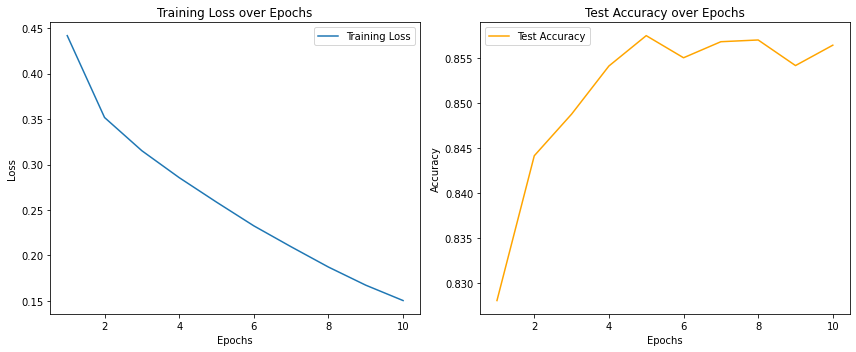

In [23]:
from sklearn.metrics import confusion_matrix, classification_report


# 테스트 데이터에서의 예측값과 실제값을 가져와서 혼동 행렬 계산
model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(model.device)
        labels = batch['labels'].to(model.device)

        outputs = model(input_ids)
        predictions = torch.argmax(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# 혼동 행렬 계산
conf_matrix = confusion_matrix(all_labels, all_predictions)

# 출력: 혼동 행렬과 성능 지표
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(all_labels, all_predictions))

# Plotting the loss and test accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), accuracies, label='Test Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()